In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Flatten,Conv2D,Activation,Dense,MaxPooling2D,Dropout

from tensorflow.keras.models import Sequential

import cv2
import os
import random

2021-10-14 20:00:09.424847: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-14 20:00:09.425108: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
dataset_folder = os.listdir("xray_dataset/chest_xray")

print(dataset_folder)
#print(np.__version__)

['val', 'chest_xray', 'test', 'train', '__MACOSX']


In [3]:
'''
Folder paths
'''
train_folder = "xray_dataset/chest_xray/train"

test_folder = "xray_dataset/chest_xray/test"

validation_folder ="xray_dataset/chest_xray/val"


In [4]:

'''
Test,Train,Val have these folders
'''
labels = ["NORMAL","PNEUMONIA"]

img_size = 50

def getData(dir):
    data = []

    for label in labels:

        path = os.path.join(dir,label)
        class_num = labels.index(label)

        for img in os.listdir(path):

            try:
                img_arr = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)

                new_arr = cv2.resize(img_arr,(img_size,img_size))

                data.append([new_arr,class_num])
            
            except Exception as error:
                print(error)
    
    return np.array(data,dtype=object)


train = getData(train_folder)

test = getData(test_folder)

val = getData(validation_folder)


In [7]:

'''
Splitting data into training and testing data

Extracting features and respective labels of data
'''
X_train = []
Y_train = []

X_val = []
Y_val = []

X_test = []
Y_test = []


'''

Appending features to X
Appending labels to Y

'''
for feature, label in train:
    X_train.append(feature)
    Y_train.append(label)

for feature, label in test:
    X_test.append(feature)
    Y_test.append(label)
    
for feature, label in val:
    X_val.append(feature)
    Y_val.append(label)

In [8]:
'''
Normalisation
'''

X_train = np.array(X_train) / 255

X_val = np.array(X_val) / 255

X_test = np.array(X_test) / 255

In [9]:

'''
Dimensions
'''
print(f"X_train shape: {X_train.shape}")

print(f"X_test shape: {X_test.shape}")

print(f"X_val shape: {X_val.shape}")

print(f"Y_train length: {len(Y_train)}")

print(f"Y_test length : {len(Y_test)}")

print(f"Y_val length : {len(Y_val)}")


X_train shape: (5216, 50, 50)
X_test shape: (624, 50, 50)
X_val shape: (16, 50, 50)
Y_train length: 5216
Y_test length : 624
Y_val length : 16


In [10]:

'''
Resizing the test ,train and validation array

'''

X_train = X_train.reshape(-1, img_size, img_size, 1)
Y_train = np.array(Y_train)

X_val = X_val.reshape(-1, img_size, img_size, 1)
Y_val = np.array(Y_val)

X_test = X_test.reshape(-1, img_size, img_size, 1)
Y_test = np.array(Y_test)

In [11]:
'''
New resized dimensions

'''
print(f"X_train shape new : {X_train.shape}")

print(f"X_test shape new : {X_test.shape}")

print(f"X_val shape new : {X_val.shape}")

print(f"Y_train shape new length: {len(Y_train)}")

print(f"Y_test shape new length: {len(Y_test)}")

print(f"Y_val shape new length: {len(Y_val)}")



X_train shape new : (5216, 50, 50, 1)
X_test shape new : (624, 50, 50, 1)
X_val shape new : (16, 50, 50, 1)
Y_train shape new length: 5216
Y_test shape new length: 624
Y_val shape new length: 16


In [13]:

'''
Training Model using CNN
'''



model = Sequential()

'''
Passing the model through a convolution model 
Activation method used is relu
'''
model.add(Conv2D(32, (3, 3), padding="same", input_shape=X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))


#Flattening the model into 1D array
model.add(Flatten())
model.add(Dense(256, activation="relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))


In [14]:
'''
Use squared error to reduce loss

Number of epochs run is 20
'''
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_val, Y_val), shuffle=True)
scores = model.evaluate(X_test, Y_test)

model.save("cnn.model")



# Accuracy and loss scores
print("Test loss {}".format(scores[0]))
print("Test accuracy {}".format(scores[1]))

2021-10-14 20:03:49.646174: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 52160000 exceeds 10% of free system memory.
2021-10-14 20:03:49.767114: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
163/163 [==============================] - 10s 60ms/step - loss: 0.3281 - accuracy: 0.8595 - val_loss: 0.4852 - val_accuracy: 0.6875
Epoch 2/10
163/163 [==============================] - 9s 56ms/step - loss: 0.1355 - accuracy: 0.9457 - val_loss: 0.9501 - val_accuracy: 0.5625
Epoch 3/10
163/163 [==============================] - 9s 54ms/step - loss: 0.1142 - accuracy: 0.9576 - val_loss: 0.5182 - val_accuracy: 0.8125
Epoch 4/10
163/163 [==============================] - 9s 53ms/step - loss: 0.0929 - accuracy: 0.9653 - val_loss: 0.4766 - val_accuracy: 0.8125
Epoch 5/10
163/163 [==============================] - 8s 50ms/step - loss: 0.0803 - accuracy: 0.9701 - val_loss: 0.3993 - val_accuracy: 0.8125
Epoch 6/10
163/163 [==============================] - 8s 51ms/step - loss: 0.0714 - accuracy: 0.9741 - val_loss: 0.2857 - val_accuracy: 0.9375
Epoch 7/10
163/163 [==============================] - 9s 52ms/step - loss: 0.0679 - accuracy: 0.9739 - val_loss: 0.1069 - val_accuracy: 1.000

2021-10-14 20:05:18.082843: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: cnn.model/assets
Test loss 1.1177573204040527
Test accuracy 0.7516025900840759


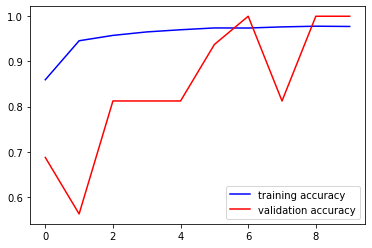

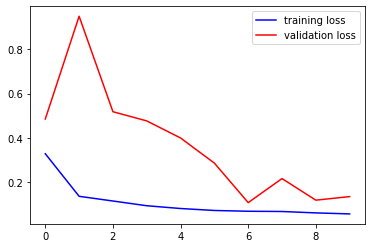

In [20]:

# visualizing the accuracy and loss of model

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="training accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="training loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [25]:
labels = ["NORMAL", "PNEUMONIA"]
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (img_size, img_size))
    return new_array.reshape(-1, img_size, img_size, 1)

model = tf.keras.models.load_model("cnn.model") # load model

In [28]:
# extra pneumonia photo from google
prediction = model.predict([prepare("xray_dataset/chest_xray/chest_xray/test/PNEUMONIA/person1_virus_6.jpeg")])
print(f'Predicted value : {labels[int(prediction[0])]}')

Predicted value :PNEUMONIA
